Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.5568 - loss: 308.0410 - val_accuracy: 0.6078 - val_loss: 40.9609
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6053 - loss: 43.6207 - val_accuracy: 0.7451 - val_loss: 21.2638
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7327 - loss: 20.2523 - val_accuracy: 0.7647 - val_loss: 7.6968
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7744 - loss: 5.2679 - val_accuracy: 0.6275 - val_loss: 12.2422
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7257 - loss: 4.5632 - val_accuracy: 0.6275 - val_loss: 15.9801
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7577 - loss: 8.6198 - val_accuracy: 0.7647 - val_loss: 10.4694
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8753 - loss: 3.6716 - val_accuracy: 0.7647 - val_loss: 7.1715
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9058 - loss: 1.7588 - val_accuracy: 0.7451 - val_loss

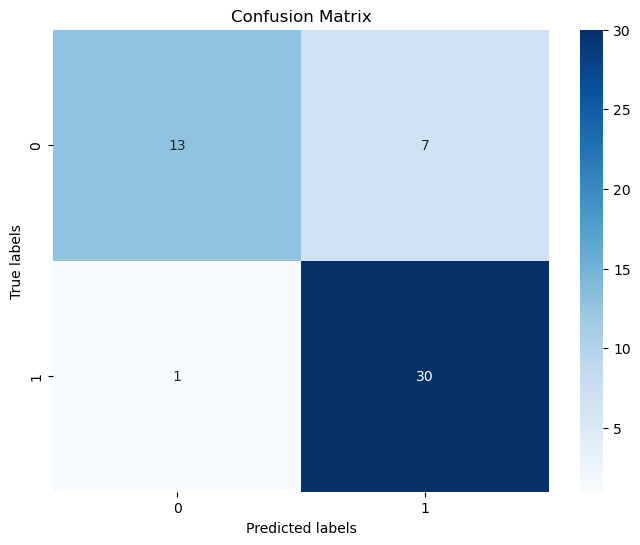

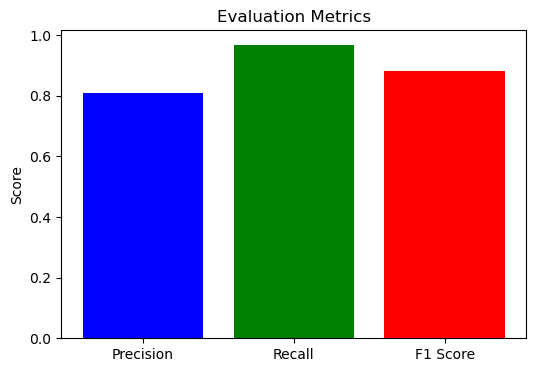

In [2]:
#Neural Networks

import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images from folders and preprocess them
def load_images_from_folders(folders):
    images = []
    labels = []
    for class_idx, folder in enumerate(folders):
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (100, 100))
                images.append(img.flatten())
                labels.append(class_idx)            # Assigning class index as label
    return np.array(images), np.array(labels)

# Provide paths to folders containing images for each class
folders = ["C:/Users/KIIT/OneDrive/Desktop/Machine learning minor project/archive (2)/brain_tumor_dataset/no", "C:/Users/KIIT/OneDrive/Desktop/Machine learning minor project/archive (2)/brain_tumor_dataset/yes"]

# Load images from folders
X, y = load_images_from_folders(folders)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple feedforward neural network using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(10000,)),  # Assuming 100x100 images flattened
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Create visualizations
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Bar plot for Precision, Recall, and F1 Score
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['b', 'g', 'r'])
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.show()


Accuracy: 0.8431372549019608
Confusion Matrix:
[[15  5]
 [ 3 28]]
Precision: 0.85
Recall: 0.90
F1 Score: 0.88


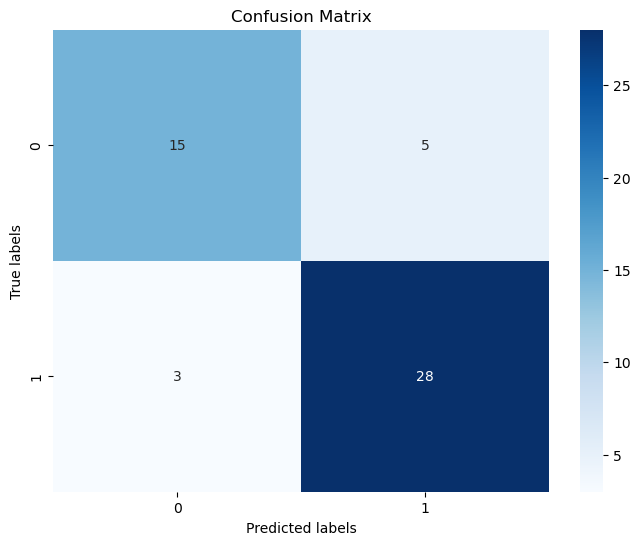

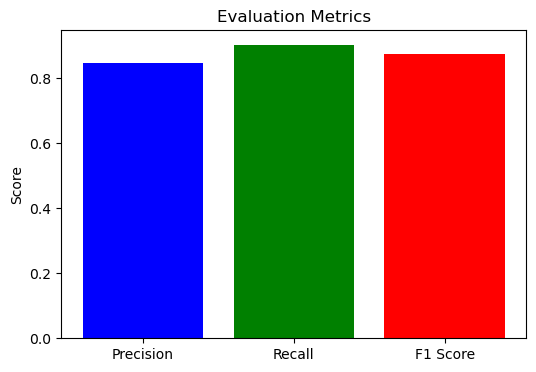

In [6]:
#SVM CODE

import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images from folders and preprocess them
def load_images_from_folders(folders):
    images = []
    labels = []
    for class_idx, folder in enumerate(folders):
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (100, 100))
                images.append(img.flatten())
                labels.append(class_idx)  # Assigning class index as label
    return np.array(images), np.array(labels)

# Provide paths to folders containing images for each class
folders = ["C:/Users/KIIT/OneDrive/Desktop/Machine learning minor project/archive (2)/brain_tumor_dataset/no", "C:/Users/KIIT/OneDrive/Desktop/Machine learning minor project/archive (2)/brain_tumor_dataset/yes"]

# Load images from folders
X, y = load_images_from_folders(folders)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Create visualizations
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Bar plot for Precision, Recall, and F1 Score
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['b', 'g', 'r'])
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.show()


Accuracy: 0.9411764705882353
Confusion Matrix:
[[17  3]
 [ 0 31]]
Precision: 0.91
Recall: 1.00
F1 Score: 0.95


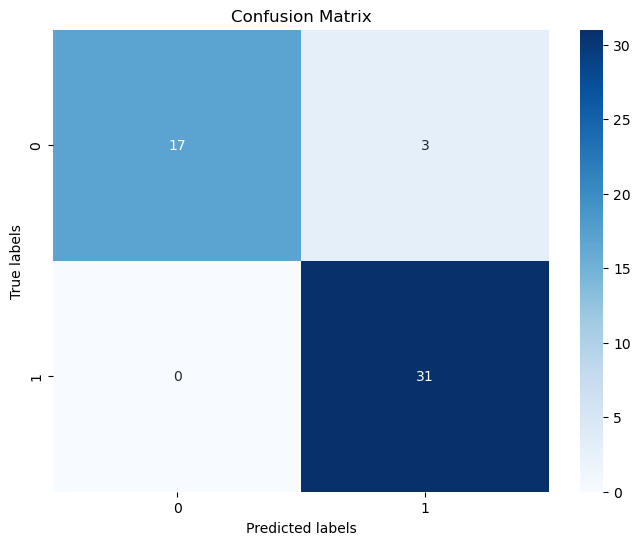

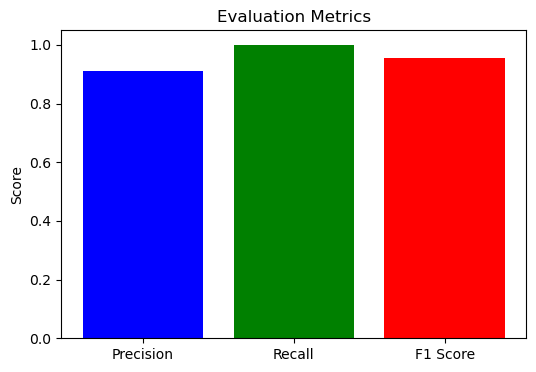

In [5]:
#random Forest

import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images from folders and preprocess them
def load_images_from_folders(folders):
    images = []
    labels = []
    for class_idx, folder in enumerate(folders):
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (100, 100))
                images.append(img.flatten())
                labels.append(class_idx)  # Assigning class index as label
    return np.array(images), np.array(labels)

# Provide paths to folders containing images for each class
folders = ["C:/Users/KIIT/OneDrive/Desktop/Machine learning minor project/archive (2)/brain_tumor_dataset/no", "C:/Users/KIIT/OneDrive/Desktop/Machine learning minor project/archive (2)/brain_tumor_dataset/yes"]

# Load images from folders
X, y = load_images_from_folders(folders)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Create visualizations
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Bar plot for Precision, Recall, and F1 Score
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['b', 'g', 'r'])
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.show()
